# <ins>Project 5 Telecom Churn<ins>

## Business Overview
Tasked with creating a classifier to predict whether SyriaTel customers will churn so they can reduce how much money is lost on customers who won't be sticking much longer, can focus on retention, and identify. This will help them recognize patterns of leaving customers.

## Data Understanding

Data is taken from [Kaggle]("https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset") Contains 3333 rows of customers and 21 columns. Our data contains information on phone use, account length, where they are from etc. Our data does have an innate imbalance because it hurts our company far more to falsely identify someone as retained when they will actually churn than it will to send a simple rention email to someone who will stay than to make no attempt to someone who will probably leave.

### Step 1. Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### Step 2. Data Loading and Understanding

In [2]:
# Uploading data as URL for easier global use
url = "https://raw.githubusercontent.com/jaredlil/project-5-telecom-churn/main/data/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(3333, 21)

Our Data has 3333 rows with 21 columns: 20 potential features and our target variable churn

In [4]:
#printing top and bottom 5 rows to get familiar with data
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
#Checking the value_counts of our target Variable and assigning it to y
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Separating our features into categorical and numerical columns for easier data cleaning

In [7]:
X_col = df.select_dtypes(exclude=['int64','float64','bool'])

In [8]:
X_num = df.select_dtypes(exclude=['bool', 'object'])

In [9]:
X_col

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


Our state and phone number columns aren't relevant to our analysis so we will be dropping those and Labelencoding the remaining columns into 0 for no, and 1 for yes values which allows our models to properly interpret them

In [10]:
X_col.drop(columns=['state','phone number'])

,international plan,voice mail plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no
...,...,...
3328,no,yes
3329,no,no
3330,no,no
3331,yes,no


In [11]:
#Initaliazing our 
label_encoder = LabelEncoder()

In [12]:
#Creating for statement to iterate over our categorical columns into encoded columns 
for col in X_col.columns:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
#We will now do the same thing with our target variable churn
df['churn'] = label_encoder.fit_transform(df['churn'])
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Step 3: Checking our features correlations to see if we have redundant columns

In [14]:
corr_matrix = df.corr()

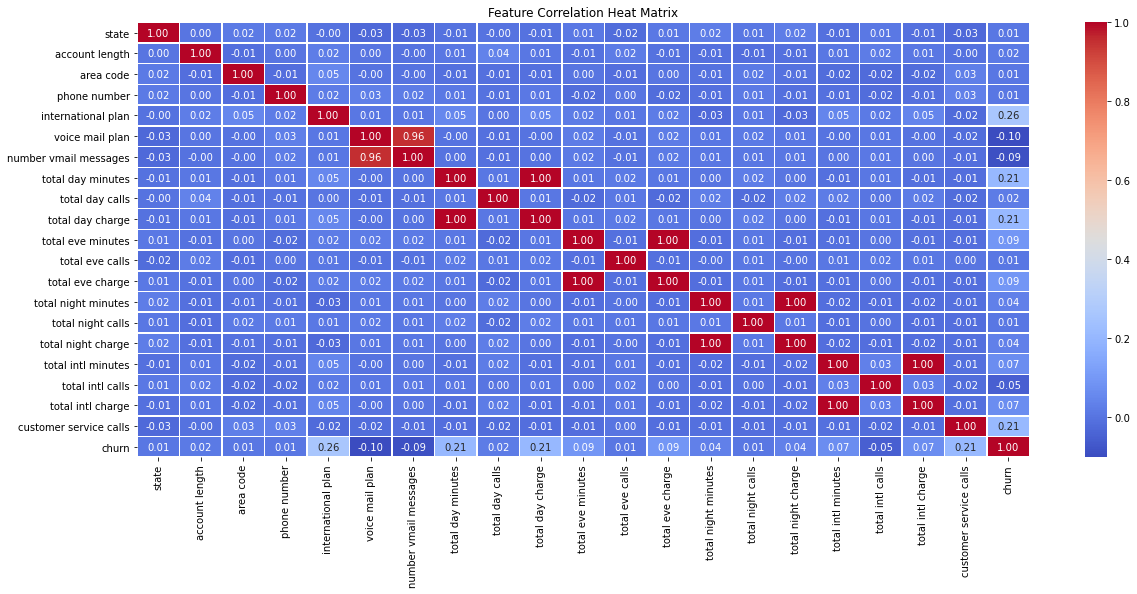

In [15]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heat Matrix")
plt.show()

Several of these features are perfectly correlated, meaning they are providing the same information to us. This makes sense, if someone has the voicemail plan there's a high likelihood they have voicemails. If someone has a high international charge it stands to reason they have high international minutes. We will be dropping duplicate columns that have a higher correlation than 90% and columns that aren't relevant to our analysis

In [16]:
df.drop(columns=[
        'area code',
        'state',
        'phone number',
        'voice mail plan',
        'total day charge',
        'total eve charge',
        'total night charge',
        'total intl charge'], inplace=True
       )

In [17]:
df.shape

(3333, 13)

We are now down to 15 numeric features and our target variable, all with no missing values, and properly encoded, but let's plot our variables to determine if missing data is in fact

array([[<AxesSubplot:title={'center':'account length'}>,
        <AxesSubplot:title={'center':'international plan'}>,
        <AxesSubplot:title={'center':'number vmail messages'}>,
        <AxesSubplot:title={'center':'total day minutes'}>],
       [<AxesSubplot:title={'center':'total day calls'}>,
        <AxesSubplot:title={'center':'total eve minutes'}>,
        <AxesSubplot:title={'center':'total eve calls'}>,
        <AxesSubplot:title={'center':'total night minutes'}>],
       [<AxesSubplot:title={'center':'total night calls'}>,
        <AxesSubplot:title={'center':'total intl minutes'}>,
        <AxesSubplot:title={'center':'total intl calls'}>,
        <AxesSubplot:title={'center':'customer service calls'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

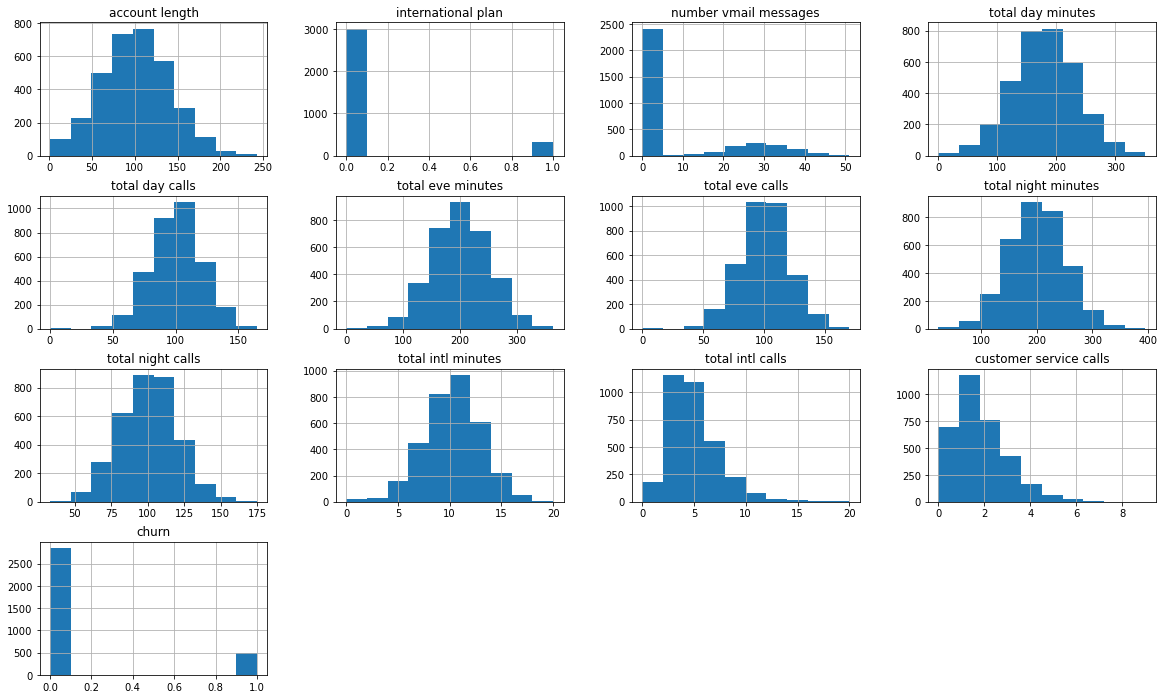

In [18]:
df.hist(figsize = (20,12))

<Figure size 720x432 with 0 Axes>

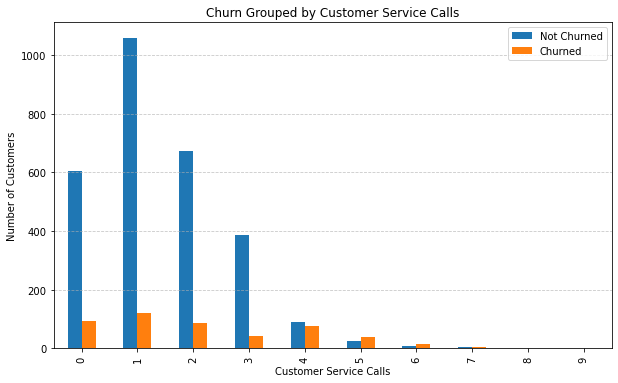

In [19]:
# Grouping churn data by customer service calls
churn_grouped = df.groupby("customer service calls")["churn"].value_counts().unstack()

# Plotting the results
plt.figure(figsize=(10, 6))
churn_grouped.plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel("Customer Service Calls")
plt.ylabel("Number of Customers")
plt.title("Churn Grouped by Customer Service Calls")
plt.legend(["Not Churned", "Churned"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Plot each numerical feature grouped by churn
num_features = df.drop(columns=['churn']).columns

# Set figure size
plt.figure(figsize=(15, 30))

# Loop through features and create subplots
for i, feature in enumerate(num_features, 1):
    plt.subplot(len(num_features)//2 + 1, 2, i)
    
    # Group by feature and churn, then count occurrences
    grouped_data = df.groupby([feature, "churn"]).size().unstack()
    
    # Plot bar chart
    grouped_data.plot(kind='bar', stacked=False, ax=plt.gca(), colormap="coolwarm")
    
    plt.title(f"Churn Distribution by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Customers")
    plt.legend(["Not Churned", "Churned"])

plt.tight_layout()
plt.show()

This approach is very brute force to see a general overview of all our features grouped by feature and churn. From the above graphs some are obviously more helpful than others. The ones I am most interested in so far are customer service calls and international plan. There is a suprising amount of churn for customers that have the international plan and there is a drastic increase in churn for people who make 2 or more international calls. Account length is also interesting. Some of our features are not helpful at all such as state, it is hard to see any relationship there as it is more or less uniform throughout. 

### Step 5: Train Test Splits and Scaling our Data
Our data still has some issues but has mostly been cleaned. From here we will assign our variables, split into train and test data sets, and scale our training data only

In [ ]:
# assigning X to all our remaining features
X = df.drop(columns=['churn'])
y = df['churn']

In [ ]:
#splitting our data, passing startify = y to maintain churn proportion in our test and target splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
#initializing scaler, helpful since our features are in the thousands and some are in the tens
scaler = StandardScaler()

In [ ]:
# fitting on our training set only
scaler.fit(X_train)

# transforming our train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 6: Modeling
We are now ready for modeling, we will start with a baseline LogisticRegression then move onto a DecisionTreeClassifier and RandomForestClassifier 

In [ ]:
#Initializing, fitting and running our prediction on X_train_scaled 
lr_model = LogisticRegression(class_weight="balanced", random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Creating a Function to easily evaluate our models
def evaluate_model(model_name, y_true, y_pred):
    """Evaluates model performance and prints metrics along with a confusion matrix."""
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Not Churned", "Churned"],
                yticklabels=["Not Churned", "Churned"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

In [ ]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)

Our Accuracy and Recall are decently high but our precision is pretty bad. This means that our model was good at predicting churn, but also overcompensated and predicted customers were aren't going to leave as likely to leave. This would affect our companies retention efforts. Overall it is better to reach out to capture those likely to capture as many customers likely to churn while also grabbing some who weren't planning on leaving. 

The main issue is our data is not linear and therefore not a great match for a logistic regression. Let's try a model that can handle nonlinear data with multiple features quickly and efficiently

We will now move onto other models to see if we can improve those metrics

In [ ]:
#Now repeating the previous step with a DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

#Fitting on our original X_train as scaling is unnecessary for a Decision tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
evaluate_model("DecisionTreeClassifer", y_test, y_pred_dt)

The overall metrics of this Decision Tree Classifier are better but not in the metric that we care most about. Our recall actually decreased from 74% to 64%. A potential reason for this could be that our tree is overfitting on our training data and not performing well on our test data

We can now try a Random Forest Classifier which averages several Decision Trees Classifiers and reduces the chances of overfitting on our data. It is more computationally intensive but if our metrics increase it will be well worth it.

In [ ]:
#Testing to see if a randomforestclassifer would classify our churn better
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rt = dt_model.predict(X_test)

In [ ]:
evaluate_model("RandomForestClassifier", y_test, y_pred_rt)

We have the exact same metrics from both our Decision Tree Classifier and Random Tree Classifier so lets try tuning our Decision Tree Classifier model further to see if we can account for overfitting and improve our metrics, we will first check out feature importance

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

In [ ]:
dt_model_tuned = DecisionTreeClassifier(
    max_depth=5,              # Limits tree depth to prevent overfitting
    min_samples_split=10,     # Minimum samples needed to split a node
    min_samples_leaf=5,       # Minimum samples required per leaf node
    class_weight="balanced",  # Handles class imbalance
    random_state=42
)

In [ ]:
dt_model_tuned.fit(X_train, y_train)
y_pred_dtt = dt_model_tuned.predict(X_test)

In [ ]:
evaluate_model("DecisionTreePruned",y_test, y_pred_dtt)

In [ ]:
feature_importances = pd.Series(dt_model_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

YAY this is our best performing model yet. Our recall which is the most important evaluation metric is 76%, it's less computationally intensive, can easily give us the most important features which are total day minutes, customer service calls, and international plan. 

### Step 6: Evalutation and Limitations

Our best performing model was a pruned Decision Tree which was accurately able to predict churn with 90% accuracy. However, due to the limited amount of data as well as the imbalance in our churn target variable in this instance we care more about our recall metric. 
Our recall metrics measures how correctly our model was able to correctly identify customers who would churn. The reason we care about this over all other metrics is due to to the fact that it hurts our company more to lose a customer we thought would stay than it is to attempt retention efforts toward someone who has no plans on leaving as that will be a minor inconvenience for them.
Our Recall was again 76% with the most important features being total day minutes, customer service calls and if they had an international plan.

With a larger dataset it is absolutely possible to improve our model even further. Many academic articles have approached this problem as well including one that was able to attain a 99% accuracy, 99% precision score as well as a 99.01% recall score cited below

Wagh, S. K., Andhale, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. (2023). Customer churn prediction in telecom sector using machine learning techniques. Results in Control and Optimization, 14, 100342. https://doi.org/10.1016/j.rico.2023.100342

## Step 7: Conclusion/Recommendation:
Use this model to save company money, work with our marketing team and collect more data to train a more robust machine learning model:
\n Focus retention efforts on the following features:
* Total day minutes
* Customer service calls
    * Especially customers who have had to call in more than 2 times
* Customers with intenational plans